Question 01

256


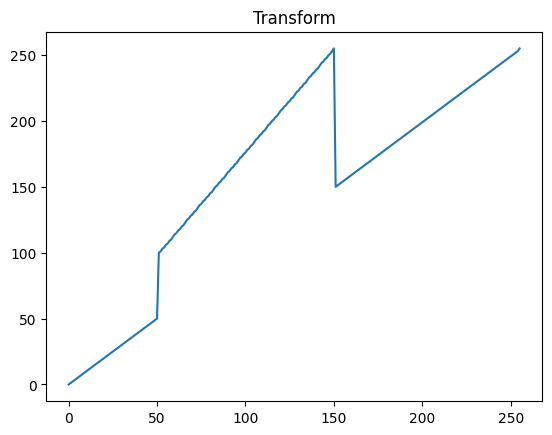

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,50),(50,100),(150,255),(150,150),(255,255)]) # points defined as variables
t1 = np.linspace(0,c[0,1],c[0,0]+1-0).astype(np.uint8) # first line
t2 = np.linspace(c[0,1],c[1,1],0).astype(np.uint8) # second line
t3 = np.linspace(c[1,1],c[2,1],c[2,0]-c[0,0]).astype(np.uint8) # third line
t4 =np.linspace(c[3,1],c[2,1],0).astype(np.uint8)
t5 =np.linspace(c[3,1],c[4,1],c[4,0]-c[3,0]).astype(np.uint8)
T1 = np.concatenate((t1, t2), axis=0).astype(np.uint8)
T2 = np.concatenate((T1, t3), axis=0).astype(np.uint8)
T3 = np.concatenate((T2, t4), axis=0).astype(np.uint8)
transform= np.concatenate((T3, t5), axis=0).astype(np.uint8) # final transformation
print(len(transform))
fig , ax = plt.subplots( )
ax.plot(transform) # plotting the transformation
plt.title('Transform')

img_orig=cv.imread('emma_gray.jpg',cv.IMREAD_GRAYSCALE) # importing the original image
img_orig = cv.resize(img_orig, (400, 400))   
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",img_orig)
cv.waitKey(0)
image_transformed =cv.LUT(img_orig ,transform)
image_transformed=cv.resize(image_transformed, (400, 400))
cv.imshow("Transformed Image",image_transformed)
cv.waitKey (0)
cv.destroyAllWindows( )

Question 02

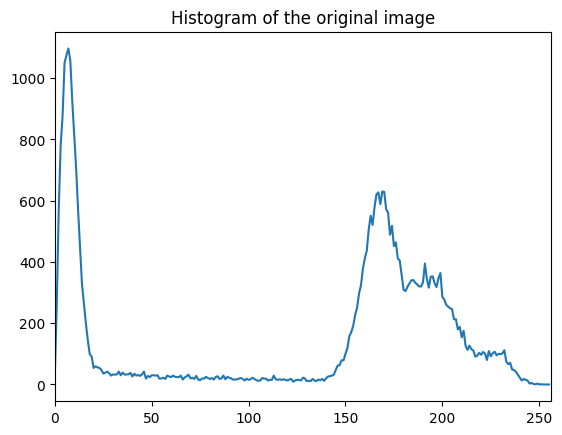

255


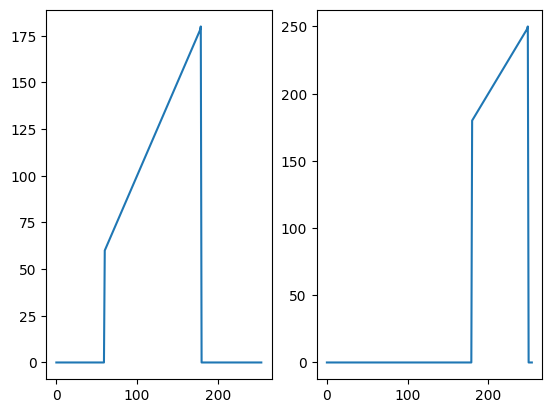

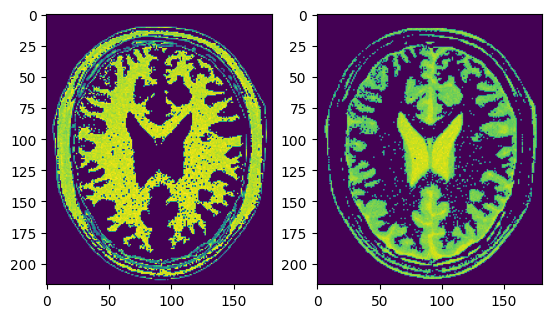

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
hist=cv.calcHist([im],[0],None,[256],[0,256]) # calculating the histogram
plt.plot(hist)
plt.title('Histogram of the original image')
plt.xlim([0,256])
plt.show()

c = np.array([(60,180),(180,250)])
t1 = np.linspace(0,0,c[0,0]-0).astype(np.uint8)
t2 = np.linspace(c[0,0],c[0,1],c[0,1]-c[0,0]).astype(np.uint8)
t3 = np.linspace(0,0,255-c[0,1]).astype(np.uint8)
T1 = np.concatenate((t1, t2), axis=0).astype(np.uint8)
T2 = np.concatenate((T1, t3), axis=0).astype(np.uint8)

t4 = np.linspace(0,0,c[1,0]-0).astype(np.uint8)
t5 = np.linspace(c[1,0],c[1,1],c[1,1]-c[1,0]).astype(np.uint8)
t6 = np.linspace(0,0,255-c[1,1]).astype(np.uint8)
T3 = np.concatenate((t4, t5), axis=0).astype(np.uint8)
T4 = np.concatenate((T3,t6), axis=0).astype(np.uint8)

print(len(T2))
fig , ax = plt.subplots(1,2)
ax[0].plot(T2)
ax[1].plot(T4)


img_orig=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
image_tr1=T2[img_orig]
image_tr2=T4[img_orig]
fig , ax = plt.subplots(1,2)
ax[0].imshow(image_tr1)
ax[1].imshow(image_tr2)






Question 03

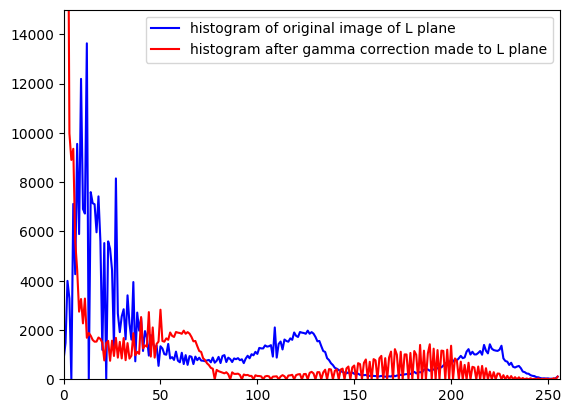

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image=cv.imread('highlights_and_shadows.jpg',cv.IMREAD_COLOR)
image=cv.cvtColor(image,cv.COLOR_BGR2Lab) # convert BGR color space to Lab color space
gamma=2 # value of gamma is 2
transform=np.array([(i/255)**gamma*255 for i in range(0,256)]).astype(np.uint8)
transformed_image=transform[image[:,:,0]]# apply gamma correction to L plane
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",image)
cv.waitKey(0)
cv.imshow("Gamma Corrected Image",transformed_image)
cv.waitKey(0)
cv.destroyAllWindows( )


hist=cv.calcHist([image],[0],None,[256],[0,256])
hist_1=cv.calcHist([transformed_image],[0],None,[256],[0,256])
plt.plot(hist,'b')
plt.plot(hist_1,'r')
plt.legend(["histogram of original image of L plane", "histogram after gamma correction made to L plane"], loc ="upper right")
plt.xlim([0,256])
plt.ylim([0,15000])
plt.show()


Question 04

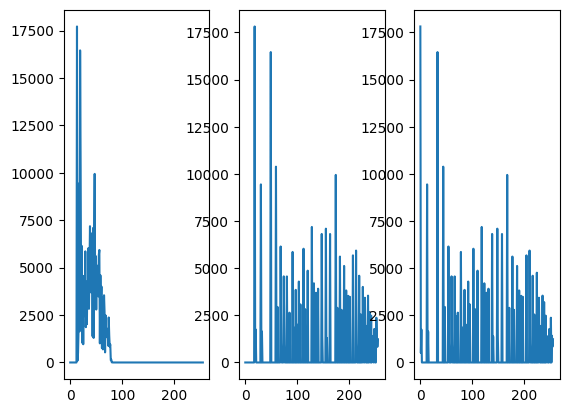

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im=cv.imread('shells.png',cv.IMREAD_GRAYSCALE)
im1=im
hist,bins=np.histogram(im.ravel(),256,[0,256])


tmp = 1.0/(im.shape[0]*im.shape[1])
b = np.zeros((256,),dtype=np.float16)


for i in range(256):
    for j in range(i+1):
        b[i] += hist[j] * tmp
    b[i] = round(b[i] * 255)

b=b.astype(np.uint8)


for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        g = im[i,j]
        im1[i,j]= b[g]

equ=cv.equalizeHist(im)

cv.imshow('original image',im)
cv.waitKey(0)
cv.imshow('histogrm equalized image without function',im1)
cv.waitKey(0)
cv.imshow('histogrm equalized image with function',equ)
cv.waitKey(0)
cv.destroyAllWindows()

hist_1,bins=np.histogram(im1.ravel(),256,[0,256])
hist_2,bins=np.histogram(equ.ravel(),256,[0,256])

fig,ax=plt.subplots(1,3)
ax[0].plot(hist)
ax[1].plot(hist_1)
ax[2].plot(hist_2)




Question 05


a) Nearest-Neighbor Method

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt



im=cv.imread('a1q5images\im02small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
original_zoomed=cv.imread('a1q5images\im02.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None
scale=4

def zoom_nn(image,scale_factor):
  rows=int(scale*image.shape[0])
  cols=int(scale*image.shape[1])
  zoomed=np.zeros((rows,cols),dtype=image.dtype)

  for i in range (0,rows):
    for j in range (0,cols):
        zoomed[i,j]=image[int(i/scale),int(j/scale)]
  return zoomed

zoomed_image=zoom_nn(im,scale)
cv.namedWindow("Original",cv.WINDOW_AUTOSIZE)
cv.imshow("Original",im)
cv.waitKey(0)
cv.namedWindow("Zoomed Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Zoomed Image",zoomed_image)
cv.waitKey(0)
cv.destroyAllWindows( )


error=np.sum((np.array(zoomed_image, dtype=np.float32) - np.array(original_zoomed, dtype=np.float32))**2)
print(error)

33531558.0


b) Bilinear Interpolation

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt



im=cv.imread('a1q5images\im02small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
original_zoomed=cv.imread('a1q5images\im02.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None
scale=4

def bilinear_zoom(original_img,scale_factor):
	
	
	rows=int(scale*original_img.shape[0])
	cols=int(scale*original_img.shape[1])
	zoomed=np.zeros((rows,cols),dtype=original_img.dtype)
	
	
	for i in range(rows):
		for j in range(cols):
			
			x = i /scale_factor
			y = j / scale_factor
			
			x_floor = np.math.floor(x)
			x_ceil = min(original_img.shape[0] - 1, np.math.ceil(x))
			y_floor = np.math.floor(y)
			y_ceil = min(original_img.shape[1] - 1, np.math.ceil(y))

			if (x_ceil == x_floor) and (y_ceil == y_floor):
				q = original_img[int(x), int(y)]
			elif (x_ceil == x_floor):
				q1 = original_img[int(x), int(y_floor)]
				q2 = original_img[int(x), int(y_ceil)]
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)
			elif (y_ceil == y_floor):
				q1 = original_img[int(x_floor), int(y)]
				q2 = original_img[int(x_ceil), int(y)]
				q = (q1 * (x_ceil - x)) + (q2	 * (x - x_floor))
			else:
				v1 = original_img[x_floor, y_floor]
				v2 = original_img[x_ceil, y_floor]
				v3 = original_img[x_floor, y_ceil]
				v4 = original_img[x_ceil, y_ceil]

				q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
				q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)

			zoomed[i,j] = q
	return zoomed.astype(np.uint8)



im1=bilinear_zoom(im,scale)
cv.namedWindow("Original",cv.WINDOW_AUTOSIZE)
cv.imshow("Original",im)
cv.waitKey(0)
cv.namedWindow("Zoomed Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Zoomed Image",im1)
cv.waitKey(0)
cv.destroyAllWindows( )

error=np.sum((np.array(im1, dtype=np.float32) - np.array(original_zoomed, dtype=np.float32))**2)

Question 06

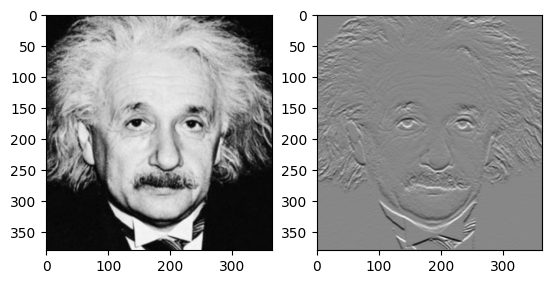

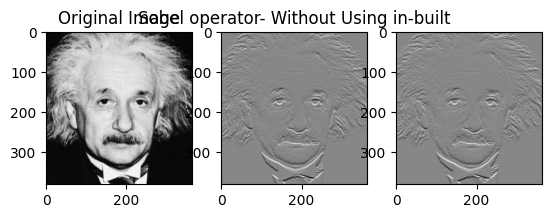

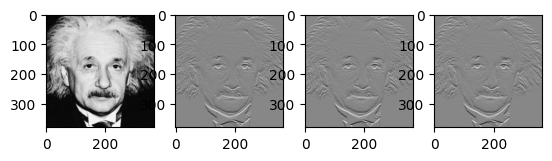

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#a) Using available method
im=cv.imread('einstein.png',cv.IMREAD_GRAYSCALE)
assert im is not None
im_float=cv.normalize(im.astype('float'),None,0.0,1.0,cv.NORM_MINMAX)
grad_x=cv.Sobel(im_float,-1,0,1,ksize=3)
grade_x=cv.normalize(grad_x.astype('float'),None,0.0,1.0,cv.NORM_MINMAX)
fig , ax = plt.subplots(1,2)
ax[0].imshow(im,cmap='gray')
ax[1].imshow(grad_x,cmap='gray')
plt.show()

#b) Using loops
sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
h,w=im.shape
k_hh,k_hw=sobel_v.shape[0]//2,sobel_v.shape[1]//2
result=np.ones(im.shape,np.float32)
for m in range (k_hh,h-k_hh):
    for n in range (k_hw,w-k_hw):
        result[m,n]=np.dot(im[m-k_hh:m+k_hh+1,n-k_hw:n+k_hw+1].flatten(),sobel_v.flatten())

fig , ax = plt.subplots(1,3)
ax[0].imshow(im,cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(grad_x,cmap='gray')
ax[1].set_title('Sobel operator- Using in-built')
ax[2].imshow(result,cmap='gray')
ax[1].set_title('Sobel operator- Without Using in-built')
plt.show()


#c) Using property
k1=np.array([[1],[2],[1]],np.float32)
k2=np.array([-1,0,1],np.float32)
k1filtered=cv.sepFilter2D(im_float,-1,k1,k2)

fig , ax = plt.subplots(1,4)
ax[0].imshow(im,cmap='gray')
ax[1].imshow(grad_x,cmap='gray')
ax[2].imshow(result,cmap='gray')
ax[3].imshow(k1filtered,cmap='gray')
plt.show()


Question 07

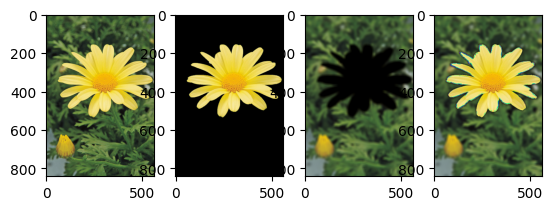

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

image = cv.imread('daisy.jpg',cv.IMREAD_COLOR)
image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
mask = np.zeros(image.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (60,60,500,500)
cv.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
image1 = image*mask2[:,:,np.newaxis]
background_image=image-image1
imageblur=cv.blur(background_image,(15,15))
blurred=image1+imageblur

fig , ax = plt.subplots(1,4)
ax[0].imshow(image)
ax[1].imshow(image1)
ax[2].imshow(imageblur)
ax[3].imshow(blurred)
